# Train/Loss

In [7]:
import json
import matplotlib.pyplot as plt

# model_dir = os.getenv('MODEL_DIR')
model_dir = "wav2vec2-large-xlsr-japlmthufiel-ipajaplmthufielta-nq-ns"
state_file = f"{model_dir}/trainer_state.json"

In [8]:
def load_training_state(state_file):
    with open(state_file, "r") as f:
        state = json.load(f)
    return state

training_state = load_training_state(state_file)

steps = []
train_loss = []
learning_rate = []

last_step = None

for entry in training_state["log_history"]:
    step = entry.get("step")
    
    if step != last_step:
        steps.append(step)
        
        train_loss.append(entry.get("loss", None))
        learning_rate.append(entry.get("learning_rate", None))

        last_step = step

print(f"Steps: {steps}, {len(steps)}")
print(f"Train Loss: {train_loss}, {len(train_loss)}")
print(f"Learning Rate: {learning_rate}, {len(learning_rate)}")


Steps: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130], 13
Train Loss: [40.699, 43.5403, 43.1048, 43.3602, 40.4699, 43.6943, 44.4978, 40.5495, 41.0213, 43.0012, 41.7039, 42.5735, 38.6081], 13
Learning Rate: [1.0000000000000002e-06, 2.0000000000000003e-06, 3e-06, 4.000000000000001e-06, 5e-06, 6e-06, 7.000000000000001e-06, 8.000000000000001e-06, 9e-06, 1e-05, 1.1000000000000001e-05, 1.2e-05, 1.3000000000000001e-05], 13


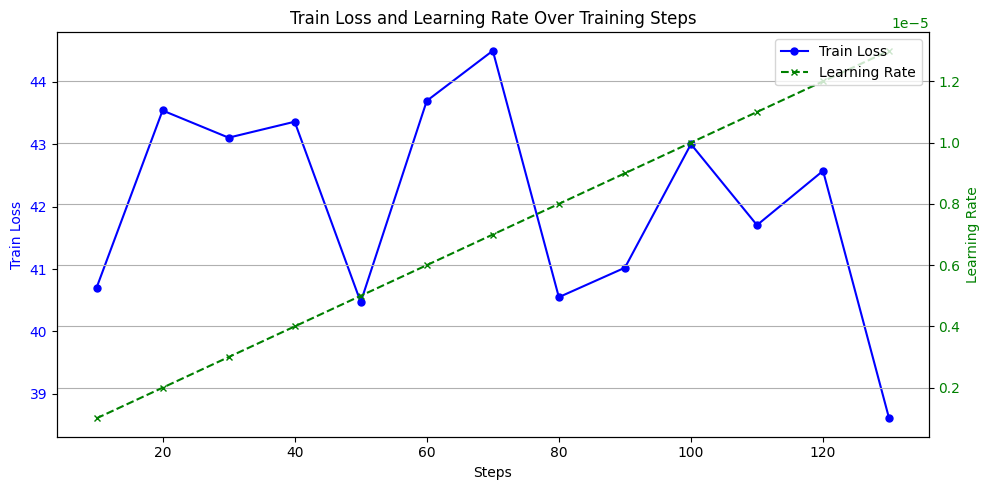

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_xlabel("Steps")
ax1.set_ylabel("Train Loss", color='blue')
ax1.plot(steps, train_loss, label="Train Loss", marker="o", color='blue', linestyle='-', markersize=5)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel("Learning Rate", color='green')
ax2.plot(steps, learning_rate, label="Learning Rate", marker="x", color='green', linestyle='--', markersize=5)
ax2.tick_params(axis='y', labelcolor='green')

plt.title("Train Loss and Learning Rate Over Training Steps")
fig.tight_layout()  
plt.grid(True)

fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

plt.show()